**Note: Your code/analysis should be self-explanatory with necessary comments.**

**You should prepare a tutorial for this part. Your tutorial should include the following:**

- **Loading the dataset and setting up the dependent variable**
- **Writing the code for each classification method**
- **Printing the output and interpreting the results**
- **Summarizing the findings and discussing the pros and cons of each method**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Tetuan-City-power-consumption.csv')

In [3]:
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


# Question 1

**Use `'Temperature'` as the independent variable and `'power consumption of Zone 1'` as the dependent variable to conduct a simple linear regression.**

In [5]:
from sklearn.linear_model import LinearRegression

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Temperature', ylabel='Zone 1 Power Consumption'>

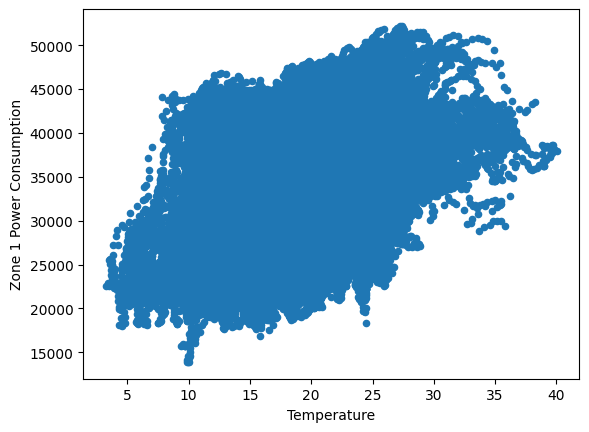

In [6]:
df.plot(x='Temperature',y='Zone 1 Power Consumption',kind='scatter')

In [7]:
target1 = df[['Zone 1 Power Consumption']]
feature1 = df[['Temperature']]

In [8]:
feature1

,Temperature
0,6.559
1,6.414
2,6.313
3,6.121
4,5.921
...,...
52411,7.010
52412,6.947
52413,6.900
52414,6.758


In [9]:
# Initialize instance of linear regression
linear_reg_model = LinearRegression()
# Fit model to the data
linear_reg_model.fit(feature1, target1)

LinearRegression()

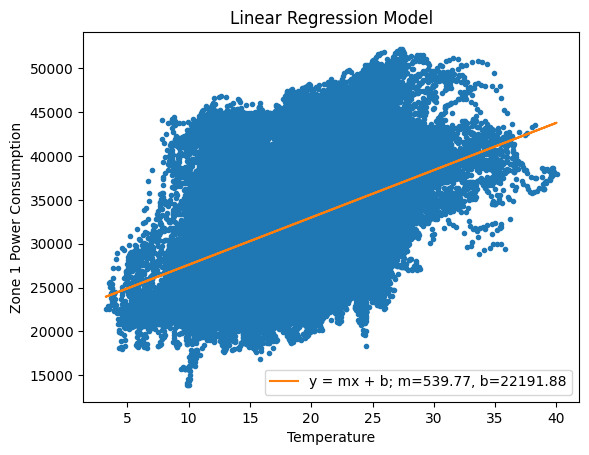

In [10]:
# Results                                        # y = mx + b
m = np.round(linear_reg_model.coef_[0][0],2)     # slope; m
b = np.round(linear_reg_model.intercept_[0],2)   # intercept; b

# plot visual
plt.plot(feature1,target1,'.')
plt.plot(feature1, linear_reg_model.predict(feature1) ,'-',label='y = mx + b; m={}, b={}'.format(m,b))
plt.xlabel(feature1.columns[0])
plt.ylabel(target1.columns[0])
plt.title('Linear Regression Model')
plt.legend()

# Question 2

**Use `'Temperature'` as the independent variable and `'power consumption of Zone 1'` as the dependent variable to conduct a polynomial linear regression.**

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly_feature = PolynomialFeatures(degree=2,include_bias=False)
X_poly1 = poly_feature.fit_transform(feature1)

In [13]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly1,target1)

LinearRegression()

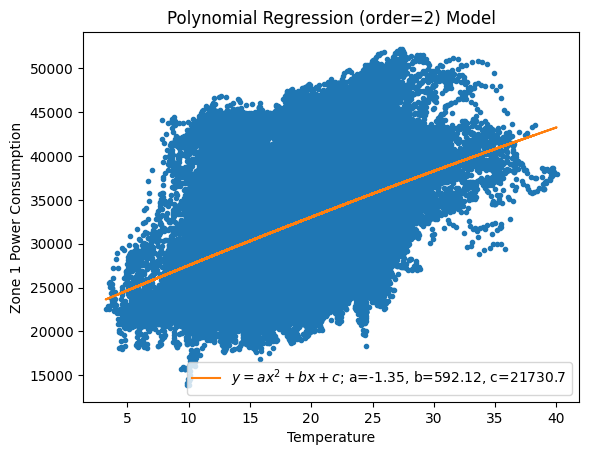

In [14]:
# Results                                # y = ax^2 + bx + c
b,a = np.round(poly_reg.coef_[0],2)      # coefficients a & b
c = np.round(poly_reg.intercept_[0],2)   # intercept; c

# plot visual
plt.plot(feature1,target1,'.')
plt.plot(feature1, poly_reg.predict(X_poly1) ,'-',label='$y = ax^2 + bx + c$; a={}, b={}, c={}'.format(a,b,c))
plt.xlabel(feature1.columns[0])
plt.ylabel(target1.columns[0])
plt.title('Polynomial Regression (order=2) Model')
plt.legend()

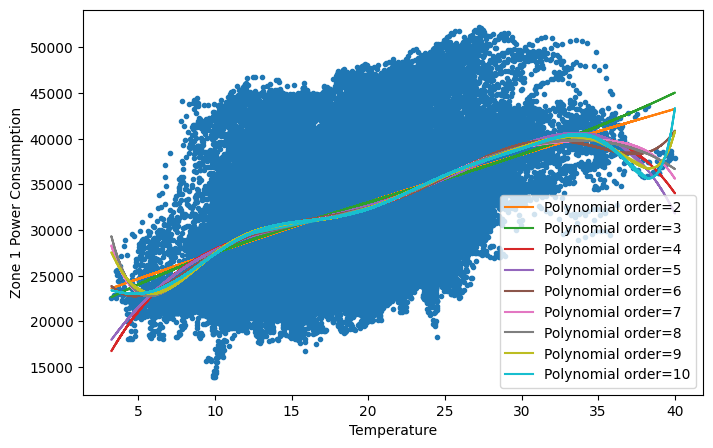

In [15]:
orders = [2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(8,5))
plt.plot(feature1,target1,'.')
for i in orders:
    poly_feature = PolynomialFeatures(degree=i,include_bias=False)
    X_poly2 = poly_feature.fit_transform(feature1)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly2,target1)
    # plot visual
    
    plt.plot(feature1, poly_reg.predict(X_poly2) ,'-',label='Polynomial order={}'.format(i))
    plt.xlabel(feature1.columns[0])
    plt.ylabel(target1.columns[0])
    #plt.title('Polynomial Regression (order={}) Model'.format(i))
    plt.legend()

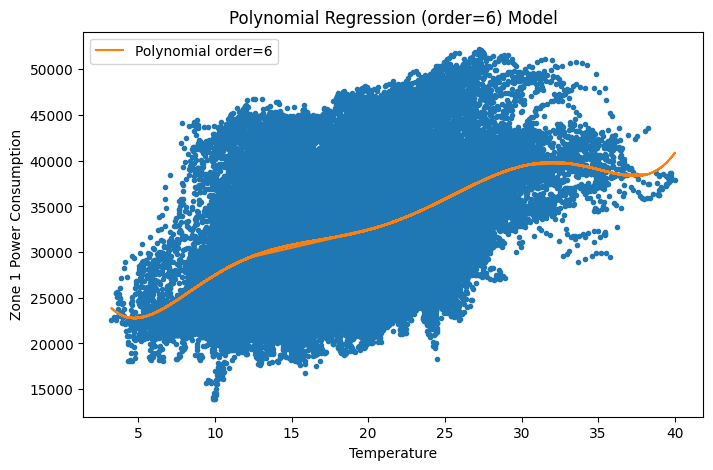

In [16]:
deg = 6
plt.figure(figsize=(8,5))
plt.plot(feature1,target1,'.')

poly_feature = PolynomialFeatures(degree=deg,include_bias=False)
X_poly = poly_feature.fit_transform(feature1)
poly_reg = LinearRegression()
poly_reg.fit(X_poly,target1)
# plot visual

plt.plot(feature1, poly_reg.predict(X_poly) ,'-',label='Polynomial order={}'.format(deg))
plt.xlabel(feature1.columns[0])
plt.ylabel(target1.columns[0])
plt.title('Polynomial Regression (order={}) Model'.format(deg))
plt.legend()

# Question 3

**Use `'Temperature'` as the independent variable and `'power consumption of Zone 1'` as the dependent variable to conduct a polynomial linear regression with regularized term of your choice (Ridge, Lasso, or Elastic Net).**

In [17]:
from sklearn.linear_model import ElasticNet

In [18]:
enet = ElasticNet(alpha=0.0)
enet.fit(X_poly,target1)

/tmp/ipykernel_797/434787772.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  enet.fit(X_poly,target1)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+12, tolerance: 2.665e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.0)

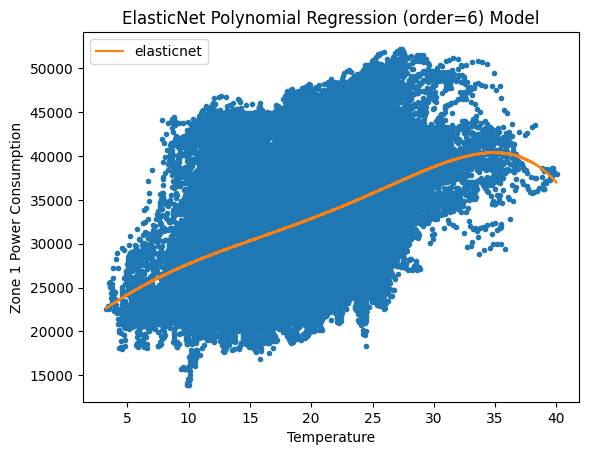

In [19]:
# plot visual
plt.plot(feature1,target1,'.')
plt.plot(feature1, enet.predict(X_poly) ,'-',label='elasticnet')
plt.xlabel(feature1.columns[0])
plt.ylabel(target1.columns[0])
plt.title('ElasticNet Polynomial Regression (order={}) Model'.format(deg))
plt.legend()

# Question 4

**Use any combination of independent variables `['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows']`, to predict `'power consumption of Zone 1'`.**

In [20]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [21]:
target2 = df[['Zone 1 Power Consumption']]
feature2 = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows']]

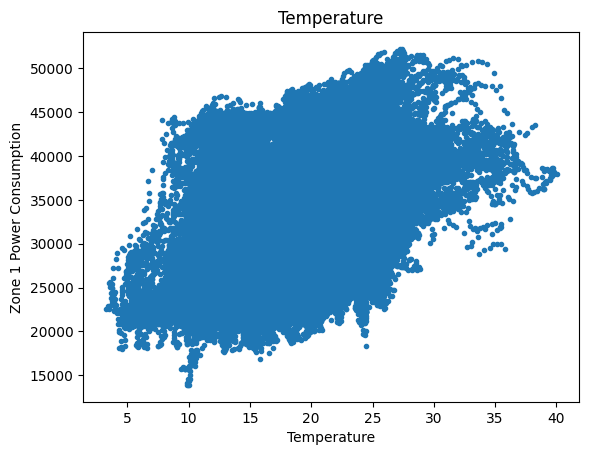

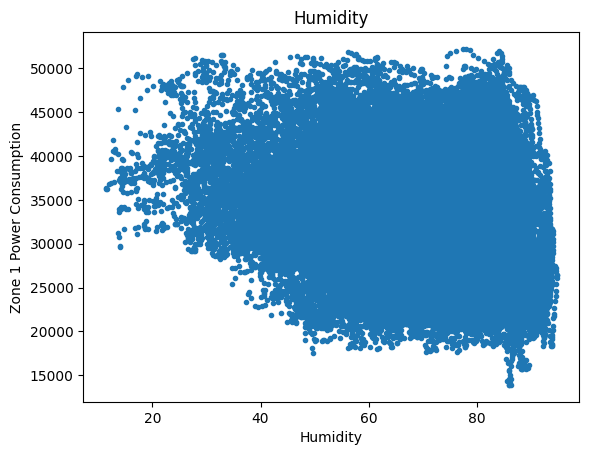

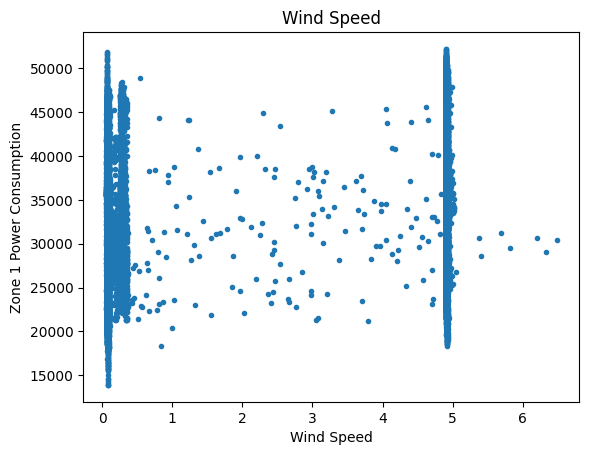

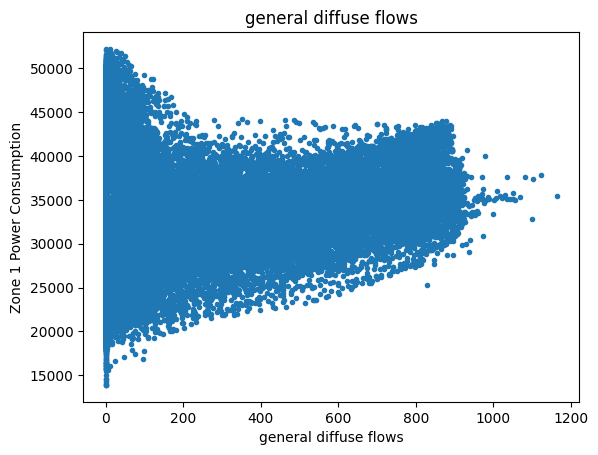

In [22]:
for i in feature2.columns:
    plt.figure()
    plt.plot(feature2[i],target2,'.')
    plt.xlabel(i)
    plt.ylabel(target2.columns[0])
    plt.title(i)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [57]:
for i in range(1,len(feature2.columns)+1):
    feature21 = feature2[feature2.columns[:i]]

    # Initialize instance of linear regression
    mult_reg = LinearRegression()
    # Fit model to the data
    mult_reg.fit(feature21, target2)

    mult_pred = mult_reg.predict(feature21)
    print()
    print('feature columns: {}'.format(list(feature21.columns)))
    print('mse = {}'.format(mean_squared_error(target2,mult_pred)))
    print('mae = {}'.format(mean_absolute_error(target2,mult_pred)))
    print('r2 = {}'.format(r2_score(target2,mult_pred)))


feature columns: ['Temperature']
mse = 40990682.08886528
mae = 5233.004380334254
r2 = 0.19379434309343935

feature columns: ['Temperature', 'Humidity']
mse = 40526667.86295068
mae = 5206.155738792154
r2 = 0.20292058532103774

feature columns: ['Temperature', 'Humidity', 'Wind Speed']
mse = 40451577.95273873
mae = 5199.44333527437
r2 = 0.20439745536331322

feature columns: ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows']
mse = 40305700.482682765
mae = 5219.020133775618
r2 = 0.20726657672409887


# Question 5

**Summarize your findings.**

Text(0.5, 1.0, 'Single feature (Temperature) regression model results for Zone1')

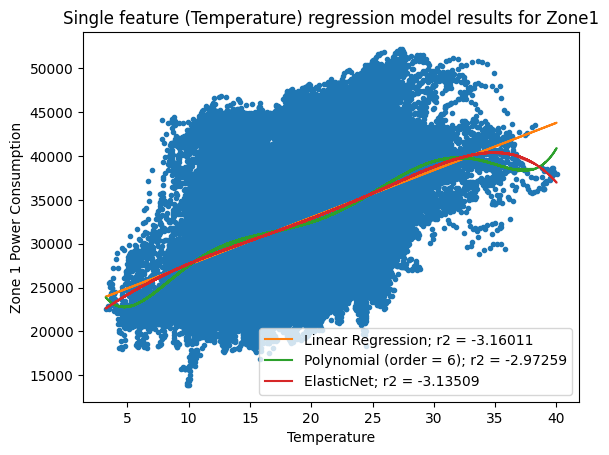

In [61]:
lin_pred = linear_reg_model.predict(feature1)
poly_pred = poly_reg.predict(X_poly)
enet_pred = enet.predict(X_poly)

# linear/polynomial regression models for Zone1 consumption vs Temperature
plt.plot(feature1,target1,'.')
plt.plot(feature1, lin_pred ,'-',label='Linear Regression; r2 = {}'.format(np.round(r2_score(lin_pred,target1),5)))
plt.plot(feature1, poly_pred ,'-',label='Polynomial (order = {}); r2 = {}'.format(deg,np.round(r2_score(poly_pred,target1),5)))
plt.plot(feature1, enet_pred ,'-',label='ElasticNet; r2 = {}'.format(np.round(r2_score(enet_pred,target1),5)))
plt.xlabel(feature1.columns[0])
plt.ylabel(target1.columns[0])
plt.legend()
plt.title('Single feature (Temperature) regression model results for Zone1')

In [62]:
# Initialize instance of linear regression
mult_reg = LinearRegression()
# Fit model to the data
mult_reg.fit(feature2, target2)

mult_pred = mult_reg.predict(feature2)
print()
print('best multiple regression model results:')
print('mse = {}'.format(mean_squared_error(target2,mult_pred)))
print('mae = {}'.format(mean_absolute_error(target2,mult_pred)))
print('r2 = {}'.format(r2_score(target2,mult_pred)))


best multiple regression model results:
mse = 40305700.482682765
mae = 5219.020133775618
r2 = 0.20726657672409887


Interestingly, the r2 (r-squared) score suggests the multiple regression model (with all suggested features) was the "best" performing model.

Which kinda makes sense, in my opinion, because temperature and zone 1 consumption didn't have a very high correlation to begin with. 

## Question 6 (optional)

## Question 7 (optional)

## Question 8 (optional)